In [1]:
import pandas as pd
import csv
import re
import mysql.connector as connection

In [7]:
path = "D:\\FSDS\MAchine_Learning\\carbon_nanotubes.csv"

In [9]:
def convert_csv_file_to_sql_table(path:str):   ###Function to convert the csv file into sql table
    try:
        with open(path,'r') as file:
            csv_file = csv.reader(file,delimiter = ";")    ##Using csv module to read the csv file
            l = []
            for file in csv_file:                           ##Appending all the csv rows into a list
                l.append(file)
            l1 = l[0]                                     ##Fetching the column names for the SQL tabel
            l2 = []
            for i in l1:                                  ##Removing all the spaces in the names  
                if type(i) == str: 
                    l2.append(i.replace(" ",""))
            cols_list=[]                                 ###Removing all the other elements except alphabets
            regex = r'[a-zA-Z]+'
            for i in l2:
                alphabets_only = re.findall(regex, i)
                cols_list.append(alphabets_only)
            cols_name = []                            ##Removing the nested list
            for i in range(len(cols_list)):
                cols_name.append(cols_list[i][0])    ##Adding INT/FLOAT to the name of the column
            p = ",".join([f"{cols_name[i]} FLOAT" if i > 1 else f"{cols_name[i]} INT" for i in range(len(cols_name))])
            k = 0   
            for i in range(len(l)):              ##Adding data to the column
                if i > 0:
                    #print(l[i])
                    f= [j.replace(",",".")for j in l[i]]
                    g = ','.join(f)
                    #print(p)
                    k = k+1                     ##Setting up the connection
                    conn = connection.connect(host="localhost",user="prakhar", passwd="123456",use_pure=True)
                    cur = conn.cursor()         ##Creating the table
                    cur.execute("create table carbon2 ({data})".format(data = (p))) 
                    cur.execute("insert into nanotube.carbon2 values ({data})".format(data = (g)))
                    print(k)
        conn.commit()            
        return
    except Exception as e:
        print(e)

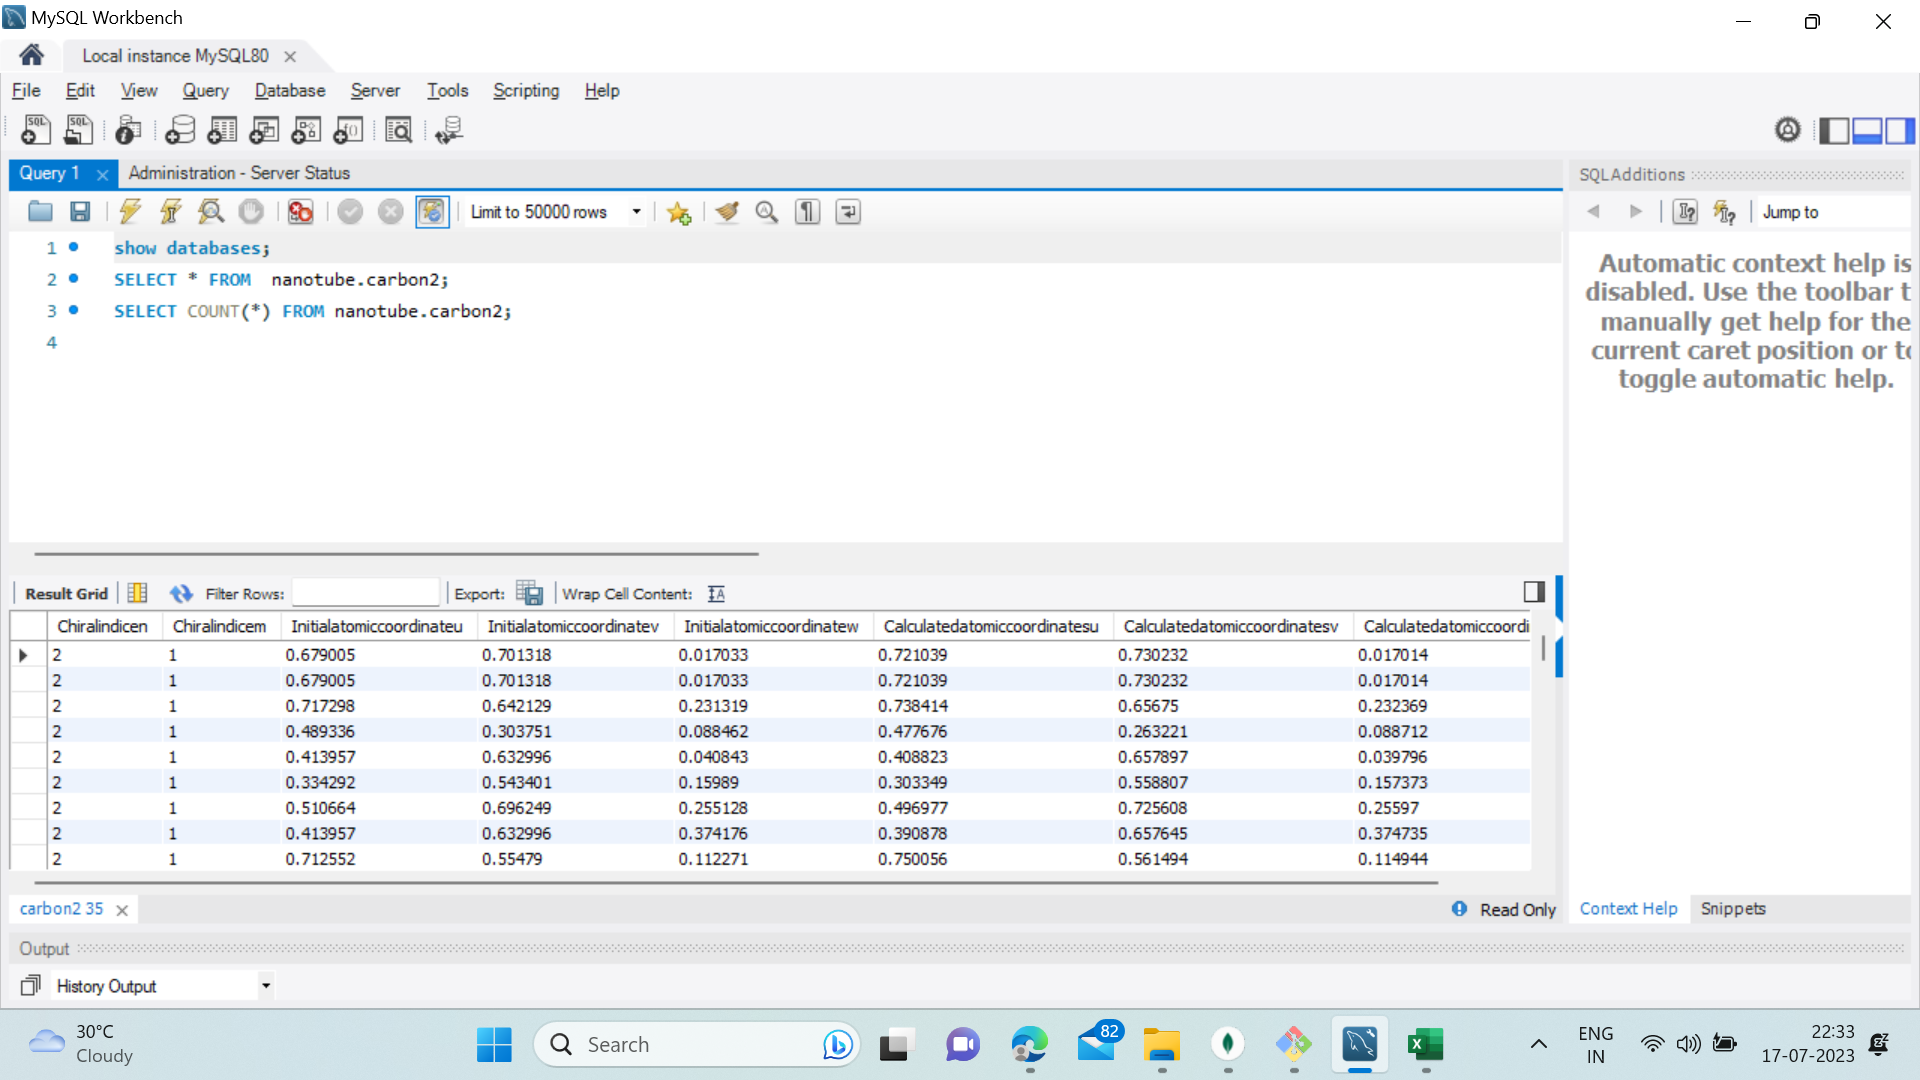